Jan Carlo L. Lima  
## AP155 Long Exam 1

### Problem 1

(a) $$ E = \frac{1}{2} m \left(\frac{dx}{dt}\right)^2 + V(x) $$  
Substitute $E = V(a)$  
$$ V(a) = \frac{1}{2} m \left(\frac{dx}{dt}\right)^2 + V(x) $$  
$$ V(a) - V(x) = \frac{1}{2} m \left(\frac{dx}{dt}\right)^2 $$  
$$ \sqrt{\frac{2}{m} \cdot \left (V(a) - V(x)\right)} = \frac{dx}{dt} $$  
$$ \int_{0}^{\frac{1}{4}T} dt = \int_{0}^{a} \sqrt{\frac{m}{2}} \frac{dx}{-\sqrt{V(a) - V(x)}} $$  
$$ \frac{1}{4}T =  \sqrt{\frac{m}{2}} \int_{0}^{a}\frac{dx}{-\sqrt{V(a) - V(x)}} $$  
$$ T =  4 \sqrt{\frac{m}{2}} \int_{0}^{a}\frac{dx}{-\sqrt{V(a) - V(x)}} $$  
$$ T =  \sqrt{8m} \int_{0}^{a}\frac{dx}{-\sqrt{V(a) - V(x)}} $$  

Notice that we take the negative square root, since d$x$/d$t$ is clearly negative.
Now we intergrate with respect to $t$ on both sides up to $t = T/4$, noting that $x(t = 0) = a$ and $x(t = T/4) = 0$, to get

$-\sqrt{\frac{1}{2}m} \int_a^0 \frac{\mathrm{d}x}{\sqrt{V(a) - V(x)}} = \frac{1}{4}T$

Then the required result follows straightforwardly.

(0, 10)

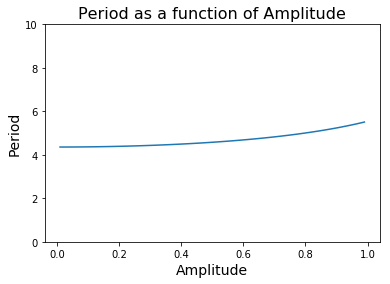

In [1]:
from gaussxw import gaussxw
from numpy import arange, sqrt
from matplotlib.pyplot import plot, xlabel, ylabel, legend, title, ylim
%matplotlib inline

m = 1.
N = 20
x,w = gaussxw(N)

def V(x):
    return x**2 - x**4/4.

# Function to calculate the period
def T(a):
    E = V(a)
    
    # Perform the integral
    xp = 0.5*a*(x+1)
    wp = 0.5*a*w
    s = 0.0
    for i in range(N):
        s += wp[i]/sqrt(E-V(xp[i]))
        
    return sqrt(8*m)*s

# Main program
apoints = arange(0.99, 0, -0.01)
Tpoints = []
for i in range(len(apoints)):
    Tpoints.append(T(apoints[i]))

plot(apoints, Tpoints)
xlabel("Amplitude", fontsize=14)
ylabel("Period", fontsize=14)
title("Period as a function of Amplitude", fontsize=16)
ylim(0,10)

(c) A harmonic oscillator has a constant period because even thought it travels farther when the amplitude is greater it also travels faster, because the initial potential energy is greater for greater amplitude. The same is true in the anharmonic oscillator above: but gets longer as $a$ approaches one, mainly because the anharmonic terms leads to a reduction of the potential compared to the pure harmonic case, which becomes more pronounced as we $a$ approaches one.

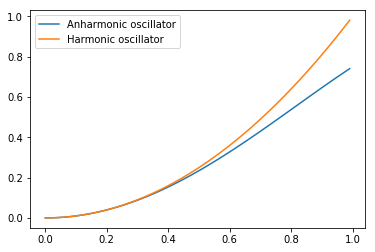

In [2]:
x = arange(0,1,0.01)
V_harmonic = lambda x: x**2
plot(x, V(x),x, V_harmonic(x))
legend(['Anharmonic oscillator','Harmonic oscillator'])

### Problem 2

From Newton's Law of Gravitation:
$$ \vec F = \frac{GMm}{r^2} \hat r $$  
The component of this force along z is:
$$ F_z =  \frac{GMm}{r^2} \frac{z}{r} $$  
since $\hat z = \frac{z}{r}.$
We know that:  
$$ M = \int \sigma dA $$  
$$ M = \sigma \int_{-\frac{L}{2}}^{\frac{L}{2}} dx \int_{-\frac{L}{2}}^{\frac{L}{2}} dy $$  
$$ M = \sigma \iint_{-L/2}^{L/2}dx dy $$  
Also we know that the r is:  
$$ r = \sqrt{x^2 + y^2 + z^2} $$  
Plug-in the equations of M and r to the equation for the z-component of the force:  
$$ F_z =  Gmz\sigma \int \int_{-L/2}^{L/2} \frac{dx dy}{(x^2 + y^2 + z^2)^{3/2}} $$  
since m = 1kg:  
$$ F_z =  G\sigma z \int \int_{-L/2}^{L/2} \frac{dx dy}{(x^2 + y^2 + z^2)^{3/2}} $$  

Text(0.5, 1.0, "Force as a function of height 'z' (m)")

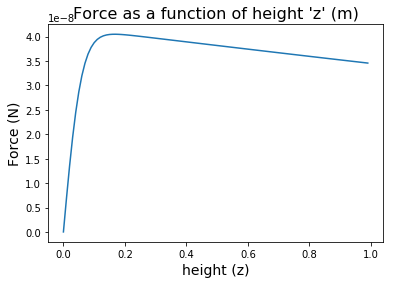

In [3]:
from gaussxw import gaussxwab

zmin = 0.0
zmax = 1.0
zstep = 0.01
N = 100
L = 10.0
G = 6.674e-11
rho = 100.0

# Calculate the points for Gaussian integration
x,w = gaussxwab(N, -L/2, L/2)

# Perform the double integral
def f(z):
    s = 0.0
    for i in range(N):
        for j in range(N):
            s += w[i]*w[j] / (x[i]**2 + x[j]**2 + z**2)**(3./2)
    return G*rho*z*s

# Main program
zpoints = arange(zmin, zmax, zstep)
fpoints = []
for i in range(len(zpoints)):
    fpoints.append(f(zpoints[i]))

plot(zpoints, fpoints)
xlabel("height (z)", fontsize=14)
ylabel("Force (N)", fontsize=14)
title("Force as a function of height 'z' (m)", fontsize=16)

(c) This solution is OK as far as it goes, but it's not exactly correct. The drop in the force close to the metal plate - the way it goes to zero as $z$ approaches zero - is an artifact that arises because when we are close to the plate, the force on the particle is dominated by the attraction of the nearby parts of the plate, those close to the origin. However, there are no integration points close to the origin, and hence this important part of the force gets missed out. One can remedy this by increasing the number of points, although this doesn't get rid of the problem entirely. A better solution is to make a change of variable $X = x/z$, $Y = y/z$, so that

$F_z = G\rho\int\int_{-L/2z}^{L/2z} \frac{\mathrm{d}X\mathrm{d}Y}{(X^2 + Y^2 + 1)^{3/2}}$

Now one can see the nature of the problem - the integral effectively becomes an integral over an infinite range as $z$ approaches zero. To get an accurate value for this integral, therefore, one must use another change of variables, so as to cover the infinite range properly. For instance, with the substitution $X = \tan\theta$ and $Y = \tan\phi$, one can get rid of the artifact entirely.

### Problem 3

In [4]:
from numpy import empty, arange
from matplotlib.pyplot import scatter, xlabel, ylabel, show
%matplotlib inline
# Constants
rmin = 0.0    # Starting value of r
rmax = 4.0    # Ending value of r
rstep = 0.01  # Increment
steps = 1000  # Number of iterations

Text(0.5, 1.0, 'Feigenbaum Plot')

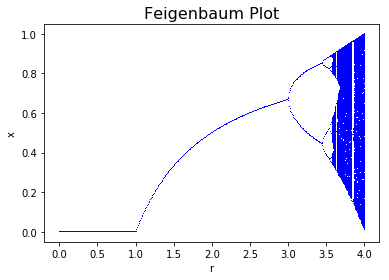

In [5]:
from numpy import array

# Set up the initial arrays
r = arange(rmin, rmax, rstep)
x = empty(len(r), float)
x[:] = 0.5

# Iterate for a while to allow it to settle down - the number of steps here just have to be
# sufficient to remove transient effects
for i in range(steps):
    x = r*x*(1-x)
    
# Calculate the values for the plot
for i in range(steps):
    x = r*x*(1-x)
    plot(r,x,"b, ")

xlabel("r")
ylabel("x")
title("Feigenbaum Plot", fontsize=16)

b) A fixed point is a value of $r$ for which there is only one value of $x$ - so it's just a single dot. A limit cycle is a discrete set of dots for the same $r$, say four of them. Chaos is a whole band of different values of $x$ for the same $r$ so it looks like a vertical line, or a set of lines.

c) Based on the plot above, it looks like the edge of chaos falls around $r = 3.6$.

(c) at around 3.5, the system moves from order to chaos

### Problem 4

Text(0.5, 1.0, 'Plot of $x^{a-1}e^{-x}$ for different values of a')

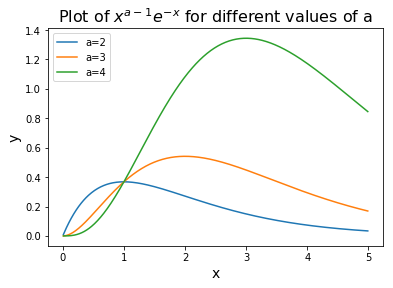

In [6]:
from numpy import exp, log, arange

def f(x,a):
    return exp((a-1)*log(x)-x)
x = arange(0.01 , 5,0.01)
plot(x,f(x,a=2), x,f(x,a=3), x, f(x,a=4))
xlabel("x", fontsize=14)
ylabel("y", fontsize=14)
legend(['a=2','a=3','a=4'])
title("Plot of $x^{a-1}e^{-x}$ for different values of a", fontsize=16)

(b) In order to determine if the maximum falss at x = a-1, we first determine the critical points of $x^{a-1}e^{-x}$:  
$$\frac{d (x^{a-1}e^{-x})}{dx} = 0$$  
$$ x^{a-1}(-e^{-x}) + e^{-x}\left((a-1)\cdot x^{a-2}\right) = 0 $$  
$$ -x^{a-1} + \left((a-1)\cdot x^{a-2}\right) = 0 $$  
$$ \left((a-1)\cdot x^{a-2}\right) - x^{a-1} = 0 $$  
When x = a-1:
$$ \left((a-1)\cdot (a-1)^{a-2}\right) - (a-1)^{a-1} = 0 $$
$$ (a-1)^{a-1} - (a-1)^{a-1} = 0 $$

(c)  
$$ z = \frac{x}{c+x} $$  
$$ (c+x) \cdot z = x $$  
$$ zc + zx = x $$  
$$ zc = x - zx $$  
$$ zc = x(1-z) $$  
$$ x = \frac{zc}{1-z} $$  
if $z = 1/2$, $x = c$  

our corresponding $c$ will be $a-1$ since it is where our maximum falls 

(d)
$$x^{a-1} = e^{(a-1)lnx}$$  

$$\Gamma (a) = \int_{0}^{\infty} e^{(a-1)lnx}e^{-x} dx $$  
from 
$$z = \frac{x}{(a-1)+x}$$  
get x in terms of z:
$$ x = \frac{(a-1)z}{1-z} $$  
and get dx in terms of dz:
$$dx = \frac{(1-z)(a-1) - \left[(a-1)\cdot z \cdot -dz \right]}{(1-z)^2}$$  
$$ dx = \frac{a-1}{(1-z)^2}dz $$  
substitute x(z) and dx to the integrand:
$$\Gamma (a) = \int_{0}^{\infty} e^{(a-1)ln\left(\frac{(a-1)z}{1-z}\right)}e^{-\left(\frac{(a-1)z}{1-z}\right)} \frac{a-1}{(1-z)^2}dz $$  
$$\Gamma (a) = \int_{0}^{\infty} e^{\left((a-1) \cdot ln\left(\frac{(a-1)z}{1-z}\right)\right)-\left(\frac{(a-1)z}{1-z}\right)} \frac{a-1}{(1-z)^2}dz $$  
and now we have our final gamma function integrand!

In [7]:
from numpy import log,exp,pi

def gamma(a):
    def f(z):
        return exp(((a-1)*log(((a-1)*z)/(1-z)))-(((a-1)*z)/(1-z))) * ((a-1))/((1-z)**2)
    
    N = 1000
    l = 0.0
    u = 1
    
# Calculate the sample points and weights, then map
    x,w = gaussxw(N)
    xp = 0.5*(u-l)*x + 0.5*(u+l)
    wp = 0.5*(u-l)*w
    
# Perform the integration
    g = 0.0
    for k in range(N):
        g += wp[k]*f(xp[k])
    return g

print(gamma(3./2))
print((0.5)*sqrt(pi))

0.886226925489104
0.8862269254527579


^ the two values are comparable!

In [8]:
print(gamma(2.))
print(gamma(5.))
print(gamma(9.))

1.0000000000000009
23.999999999999982
40320.00000000006


exactly the same as the values in the Exam handout!